In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2025-06-29 23:01:02.349399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
import tensorflow as tf
import os

data_dir = "PlantVillage"  # path to your folder

batch_size = 32

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,       # 80% train, 20% validation
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Save class names BEFORE mapping
class_names = train_ds.class_names
print("Class names:", class_names)

Found 41277 files belonging to 16 classes.
Using 33022 files for training.
Found 41277 files belonging to 16 classes.
Using 8255 files for validation.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #prevents overfitting
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # number of output classes
])

In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)

In [22]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2025-06-29 23:21:26.411257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-06-29 23:21:26.441151: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


1032/1032 [==============================] - ETA: 0s - loss: 1.8595 - accuracy: 0.4673

2025-06-29 23:21:54.737234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8255]
	 [[{{node Placeholder/_4}}]]
2025-06-29 23:21:54.737402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8255]
	 [[{{node Placeholder/_4}}]]
2025-06-29 23:21:54.776856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1032/1032 [==============================] - 31s 30ms/step - loss: 1.8595 - accuracy: 0.4673 - val_loss: 1.5019 - val_accuracy: 0.4821
Epoch 2/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.5445 - accuracy: 0.4740 - val_loss: 1.3245 - val_accuracy: 0.4939
Epoch 3/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.4595 - accuracy: 0.4739 - val_loss: 1.2710 - val_accuracy: 0.4974
Epoch 4/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.4280 - accuracy: 0.4783 - val_loss: 1.2482 - val_accuracy: 0.4941
Epoch 5/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.3676 - accuracy: 0.4786 - val_loss: 1.2545 - val_accuracy: 0.4863
Epoch 6/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.3365 - accuracy: 0.4812 - val_loss: 1.2236 - val_accuracy: 0.4813
Epoch 7/10
1032/1032 [==============================] - 31s 30ms/step - loss: 1.3266 - accuracy: 0.4824 - val_loss: 1.2590 - val_accura

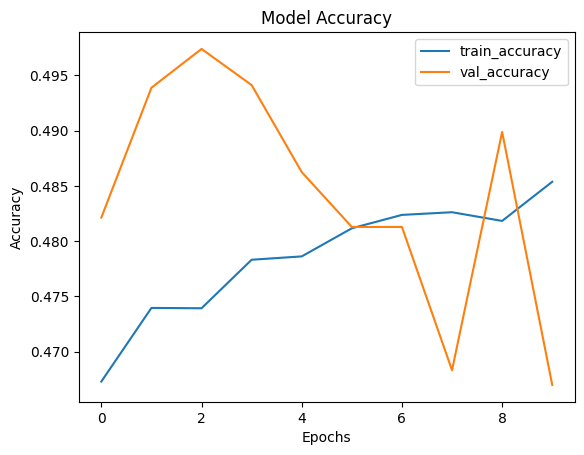

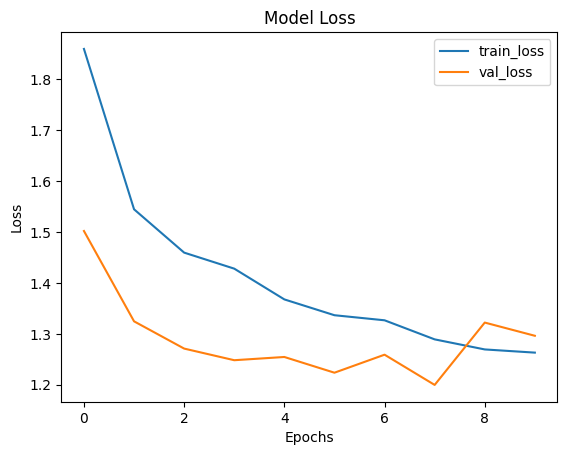

In [23]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
